In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import os

In [48]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [50]:
df.drop_duplicates(inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)

#rename columns into a more meaningful names
colnames = {'x': 'length', 
           'y': 'width',
           'z': 'depth',
           'depth': 'total_depth'}
df.rename(columns = colnames, inplace = True)
df

,carat,cut,color,clarity,total_depth,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [51]:
df.describe()

,carat,total_depth,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [52]:
cat_columns = df.select_dtypes(include='object').columns.tolist()
num_columns = df.select_dtypes(include='number').columns.tolist()
num_columns.remove('price')

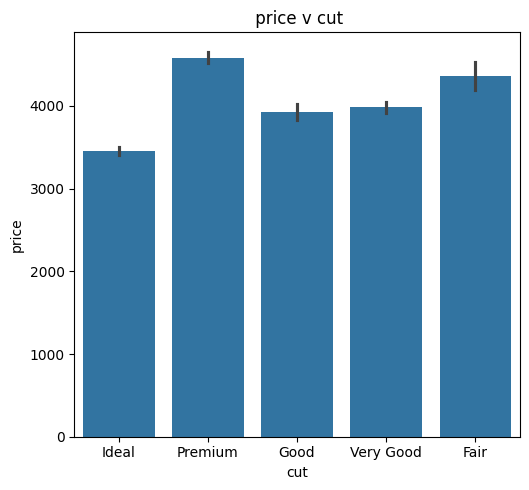

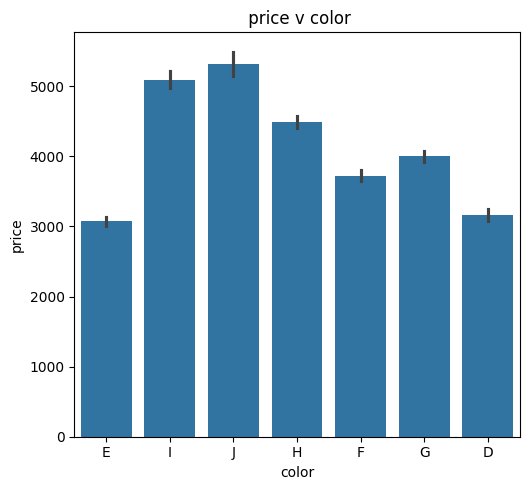

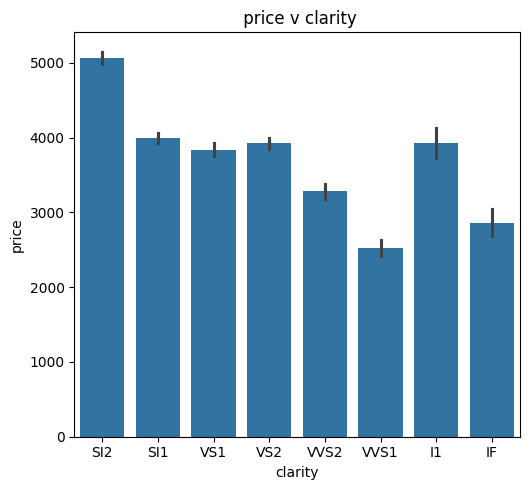

In [53]:
for col in cat_columns:
    plt.figure(figsize=[10,5])

    plt.subplot(1,2,1)
    sns.barplot(x=col, y='price', data = df)
    plt.title(f' price v {col}')
   
    plt.tight_layout()
    plt.show()

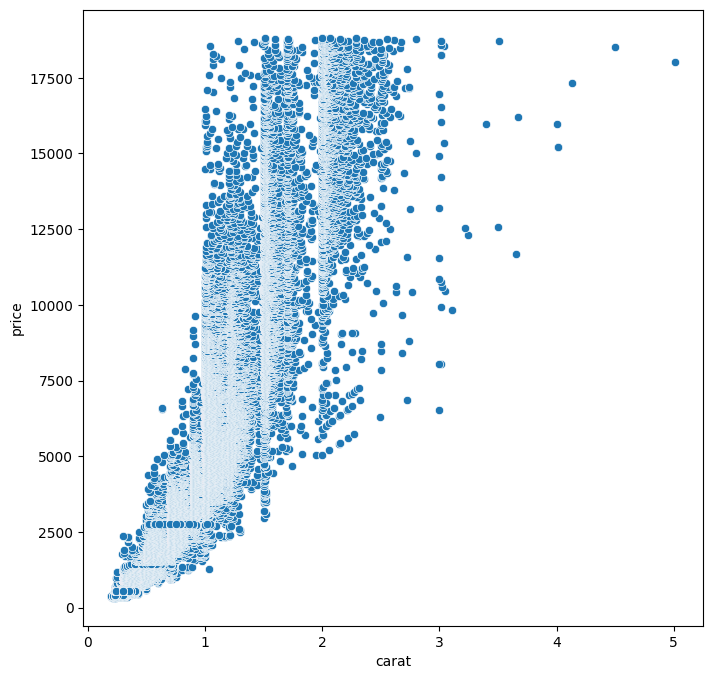

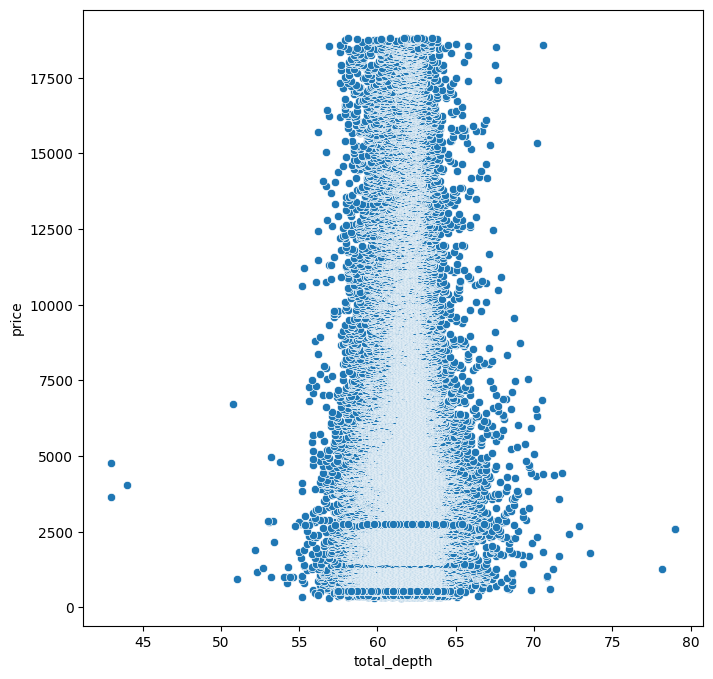

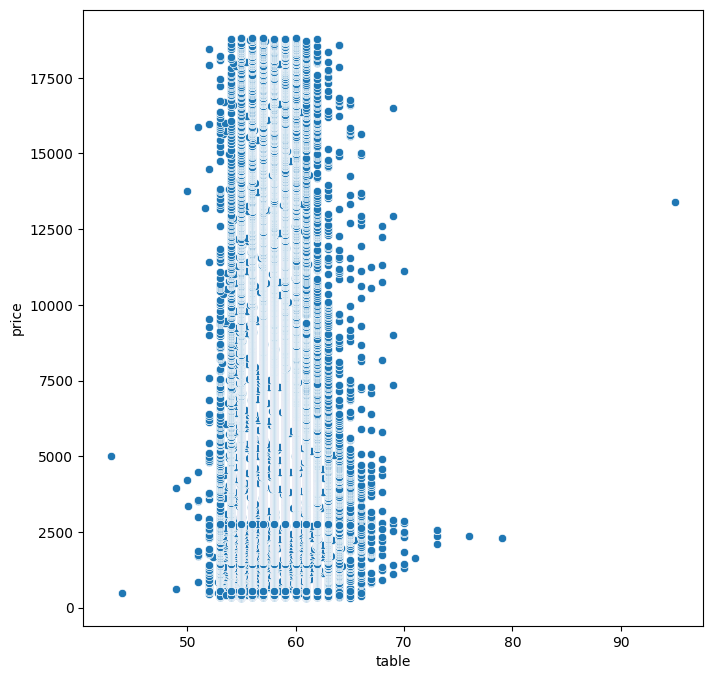

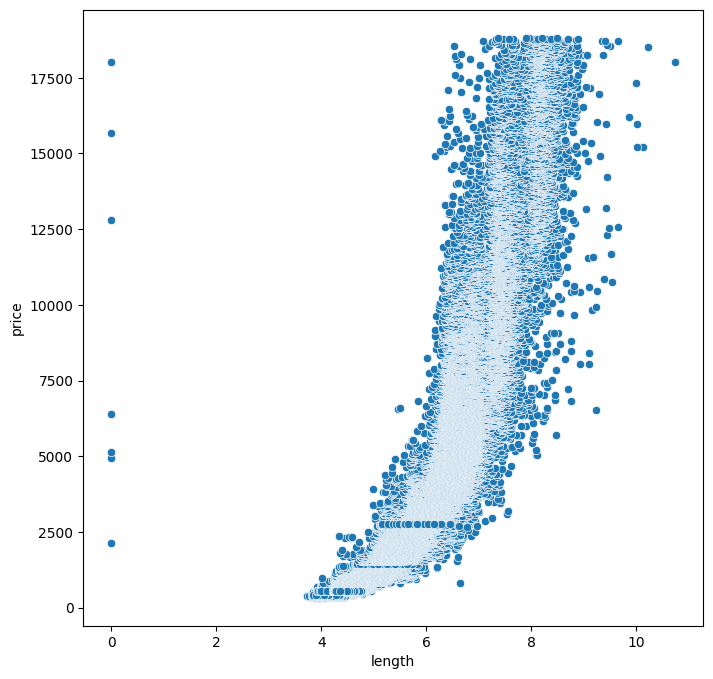

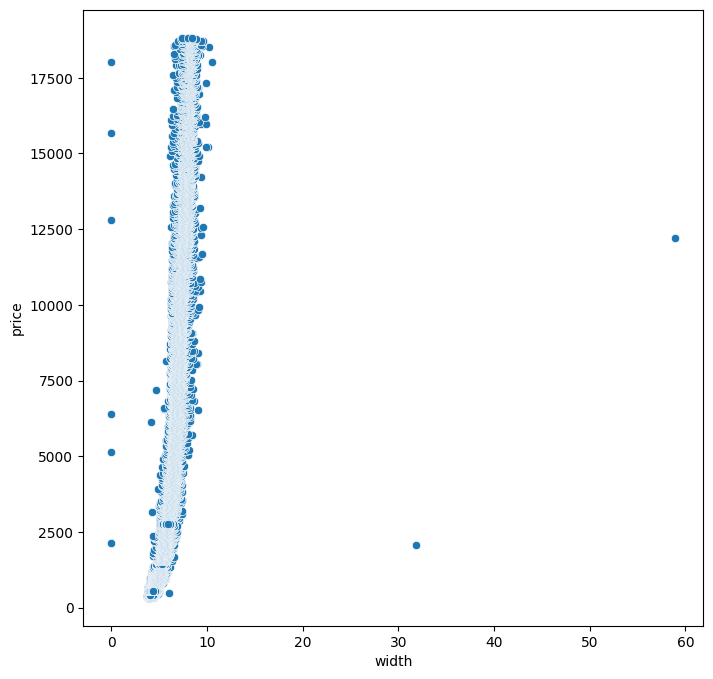

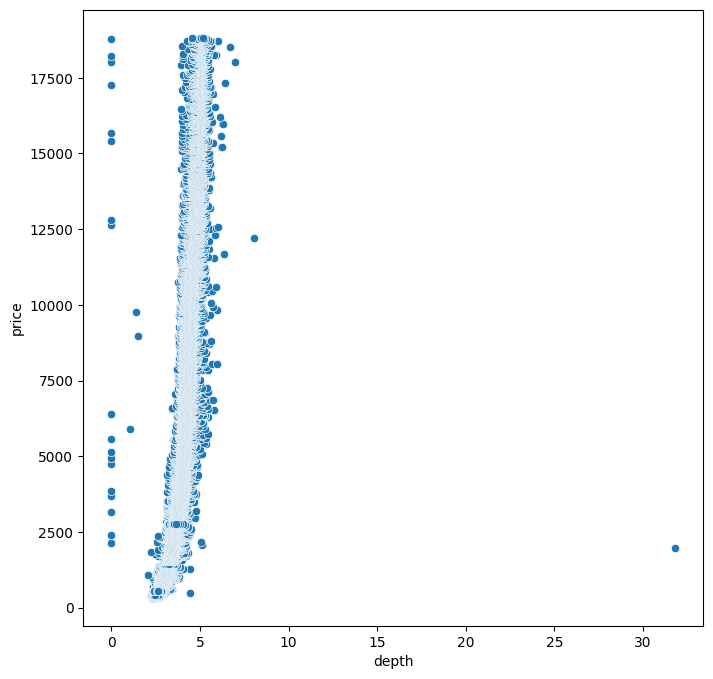

In [54]:
for col in num_columns:
    plt.figure(figsize=[8,8])
    sns.scatterplot(x=col, y='price', data = df)
    plt.show()

In [55]:
df['area'] = df['length'] * df['width']


In [56]:
correlation_matrix = df[['carat', 'total_depth', 'table', 'price', 'length', 'width', 'depth', 'area']].corr()
correlation_matrix


,carat,total_depth,table,price,length,width,depth,area
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.981676
total_depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.030916
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.187498
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.901152
length,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.984662
width,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.990856
depth,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.958460
area,0.981676,-0.030916,0.187498,0.901152,0.984662,0.990856,0.958460,1.000000


In [57]:
df[num_columns].corrwith(df['price'])

carat          0.921591
total_depth   -0.010647
table          0.127134
length         0.884435
width          0.865421
depth          0.861249
dtype: float64

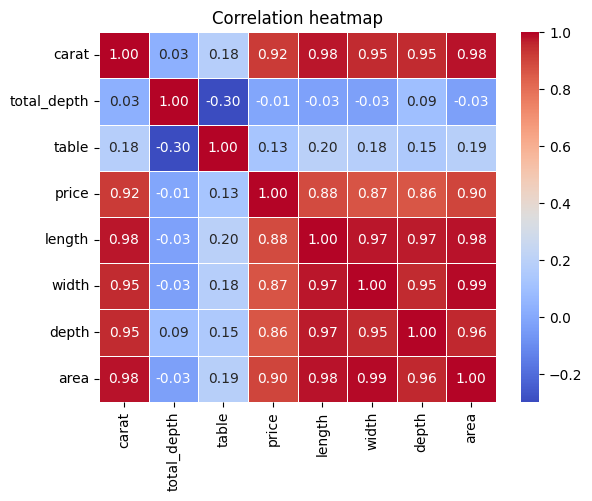

In [58]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidth = 0.5)
plt.title('Correlation heatmap')
plt.show()

In [59]:
#Linera Rgression 
Y = df['price'].to_numpy(dtype = float)
X = df[['carat','depth', 'color', 'cut', 'clarity', 'area', 'length', 'width']]
X = pd.get_dummies(X).to_numpy(dtype = float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()

lr = lr.fit(X_train, Y_train)
print('Training accuracy:', r2_score(Y_train, lr.predict(X_train)))

Training accuracy: 0.9202914463473367


In [60]:
y_pred = lr.predict(X_test)
print('Coefficient of determination :', r2_score(Y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Coefficient of determination : 0.9235491063474603
Root mean squared error: 1082.9324081376324


In [61]:
#Feature Engineering Backward elimination 
Y = df['price'].to_numpy(dtype = float)
X = df[['carat','depth', 'color', 'cut', 'clarity', 'area']] # took out length and width because area is already related feature related 
X = pd.get_dummies(X).to_numpy(dtype = float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()
lr = lr.fit(X_train, Y_train)
print('Training accuracy:', r2_score(Y_train, lr.predict(X_train)))


Training accuracy: 0.917097432342192


In [62]:
y_pred = lr.predict(X_test)
print('Coefficient of determination :', r2_score(Y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Coefficient of determination : 0.9196396612099598
Root mean squared error: 1110.275987115772


it has some impact on accuracy


In [63]:
#Feature Engineering Backward elimination 
Y = df['price'].to_numpy(dtype = float)
X = df[['carat', 'color', 'cut', 'clarity', 'area', 'length', 'width']] # removing Depth  - correlation score of 0.86 
X = pd.get_dummies(X).to_numpy(dtype = float)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lr = LinearRegression()
lr = lr.fit(X_train, Y_train)
print('Training accuracy:', r2_score(Y_train, lr.predict(X_train)))

Training accuracy: 0.9202949573907722


 taking out the Depth did not affect the model 

In [64]:
y_pred = lr.predict(X_test)
print('Coefficient of determination :', r2_score(Y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Coefficient of determination : 0.9235840916862488
Root mean squared error: 1082.6845948630905


In [65]:
le = LabelEncoder()
for i in cat_columns:
    df[i] = le.fit_transform(df[i])


y = df['price'].to_numpy(dtype = float)
x = df[['carat', 'color', 'cut', 'clarity', 'area', 'length', 'width']]
x = pd.get_dummies(x).to_numpy(dtype = float)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    
    print("MSE: ", mse)
    print("r2: ", r2)
    
    return r2, mse



In [66]:
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
lnr = LinearRegression()
xgb = XGBRegressor()

models = [rfr, abr, etr, gbr, lnr, xgb]
names = ["Random Forest", "Ada Boost", "Extra Trees","Gradient Boosting", "Linear Regression","XGB Regressor"]

In [67]:
r2s, mses = [], []
for i, j in zip(models, names):
    print("*"*30)
    print(j)
    r2, mse = training(i)
    r2s += [r2]
    mses += [mse]
    print("\n\n")

******************************
Random Forest
MSE:  318903.23751889856
r2:  0.9792107513749027



******************************
Ada Boost
MSE:  1792341.9446681635
r2:  0.883157528914429



******************************
Extra Trees
MSE:  318181.58359741105
r2:  0.9792577958731392



******************************
Gradient Boosting
MSE:  440686.9440681591
r2:  0.9712716919484883



******************************
Linear Regression
MSE:  1718462.437083208
r2:  0.8879737216361865



******************************
XGB Regressor
MSE:  304873.13794707175
r2:  0.9801253712153999





C:\Users\jijai\AppData\Local\Temp\ipykernel_22352\3026033645.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)
C:\Users\jijai\AppData\Local\Temp\ipykernel_22352\3026033645.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)


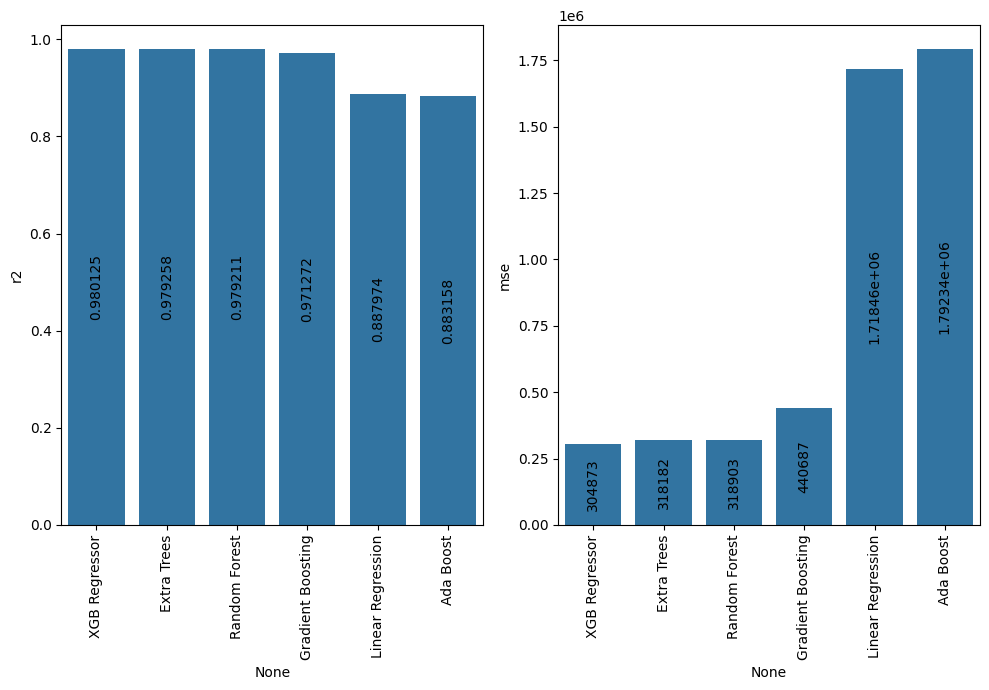

In [68]:
dt = pd.DataFrame({"r2":r2s, "mse": mses}, index=names)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
index = 0
dt = dt.sort_values("r2", ascending=False)
sns.barplot(x=dt.index, y=dt.iloc[:, index], ax=axes[index])
for container in axes[index].containers:
    axes[index].bar_label(container, label_type="center", rotation=90)
axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)

index += 1
dt = dt.sort_values("mse", ascending=True)
sns.barplot(x=dt.index, y=dt.iloc[:, index], ax=axes[index])
for container in axes[index].containers:
    axes[index].bar_label(container, label_type="center", rotation=90)
axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()